In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
import kagglehub
path = kagglehub.dataset_download("damlaerek0/telecust1000t")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Behbab\.cache\kagglehub\datasets\damlaerek0\telecust1000t\versions\1


In [10]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [12]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

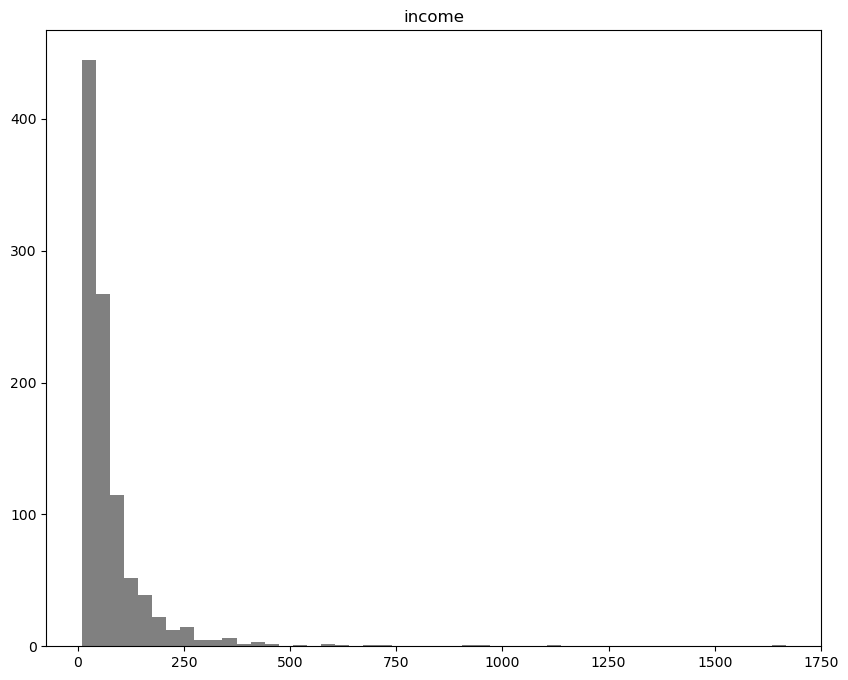

In [26]:
df.hist(column='income', bins=50, grid=False, color="grey", figsize=(10,8))

In [38]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].astype("float64")
y = df['custcat']

X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [41]:
neigh = KNeighborsClassifier(n_neighbors = 4)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [50]:
yhat = neigh.predict(X_test)
yhat_train = neigh.predict(X_train)
print("Train set Accuracy: ", accuracy_score(y_train, yhat_train))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [64]:
k=11
accuracy=[]
std_acc=[]

for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train,y_train)

    yhat = neigh.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    accuracy.append(acc)
    st = (np.std(yhat==y_test)/np.sqrt(yhat.shape[0])).round(7)
    std_acc.append(st)

accuracy, std_acc

([0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34, 0.33],
 [0.0324037,
  0.0320858,
  0.0328462,
  0.0329848,
  0.0328462,
  0.0327032,
  0.0333748,
  0.0331191,
  0.0334963,
  0.0332491])

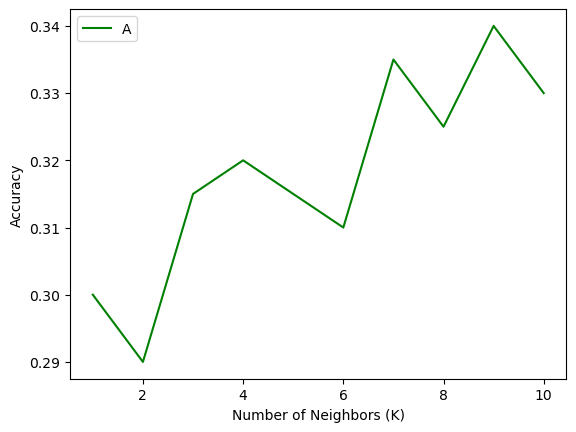

In [83]:
plt.plot(range(1,k), accuracy ,'g')

plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')

plt.show()

In [94]:
print( "The best accuracy was with", max(accuracy), "with k=", accuracy.index(max(accuracy))+1) 

The best accuracy was with 0.34 with k= 9
